# 01.デリバティブ投資分析

デリバティブとは、特定の資産（原資産）の価格に基づいて価格やリターンがきまる金融商品または取引契約の総称のこと。

原資産には、金融資産や商品、気温や降水量、電力、企業デフォルト時の債務などがある。

デリバティブの種類としては、先渡取引や先物取引、スワップなど将来一定価格で原資産を受け渡すことや一定期間キャッシュフローを交換することを約束するものとオプションのような原資産を買う権利or売る権利を取引対象とするものがある。

取引形態として、個々の市場参加者が取引所外で相対取引する店頭取引と、取引所に上場して取引される取引所取引が存在する。




# オプション取引
オプションは原資産を買う権利or売る権利を取引対象とする金融商品。

例えば、ちいかわグッズを来月100円で買う権利をもらい、実際来月80円になっていればその権利を行使せずに80円で買い、120円になっていれば権利行使をして100円で買う。

また、満期のある金融商品について、満期時に受け取るお金のことをペイオフという。

### ペイオフの計算
オプションは、原資産を買う権利と売る権利に分類される。

*   コールオプション：一定価格（行使価格）で原資産を買うこと
*   プットオプション：一定価格（行使価格）で原資産を売ること

コールオプションのペイオフは$C_T = (S_T - K)^+$

プットオプションペイオフは$P_T = (K - S_T)^+$

※$(x)^+ \equiv \text{max}(x , 0) $

例えば、ちいかわグッズを来月100円(行使価格100円)
で買う権利(コール・オプション)をもらい、実際来月80円になっていればその権利を行使せずに80円で買い(ペイオフ0)、120円になっていれば権利行使をして100円で買う(ペイオフ20円)。

### 損益の計算
このような権利が無料で取引されているわけではなく、もちろん料金がかかる。

オプションを売買することで得られる損益を以下に考える。

ver1)コールオプションを購入する場合：$(S_T - K)^+ - C_0$

ver2)コールオプションを売却する場合：$ C_0 - (S_T - K)^+$

ver3)プットオプションを購入する場合：$(K - S_T)^+ - P_0$

ver4)プットオプションを売却する場合：$P_0 - (K - S_T)^+$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_payoff(S_T, option_terms):
    """
    コール・プットオプションのペイオフを計算する関数（条件分岐で両方対応）
    """
    payoff = np.zeros_like(S_T)
    for coeff, strike, is_put in option_terms:
        if is_put:
            payoff += coeff * np.maximum(strike - S_T, 0)  # プットオプション
        else:
            payoff += coeff * np.maximum(S_T - strike, 0)  # コールオプション
    return payoff

def plot_option_payoff(S_T_range, option_terms, fixed_cost=0, title='Option Payoff'):
    """
    オプションの損益グラフを描画する関数
    """
    S_T = np.linspace(*S_T_range)
    total_payoff = calculate_payoff(S_T, option_terms) + fixed_cost

    plt.figure(figsize=(8, 5))
    plt.plot(S_T, total_payoff, color='b', label=title)
    plt.axhline(0, color='black', linewidth=0.5)  # 水平線

    # 行使価格の縦線を描画
    strike_prices = {strike for _, strike, _ in option_terms}
    for strike in strike_prices:
        plt.axvline(strike, color='gray', linestyle='--', linewidth=0.8)

    plt.xlabel(r'$S_T$ (Underlying Price)')
    plt.ylabel(r'Profit & Loss')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

## 様々な戦略の紹介
コールオプションやプットオプション単体だと、損益の実現値が発散してしまう。

そこでコールとプットのポートフォリオを組むことで不確実性を減らすことができたり、原資産の実現値に関する分布がわかっているならうまいポートフォリオ戦略を組むことで高い確率でもうけをだすようなことができる。

### ブル戦略
以下同じ原資産（株式）に関する二つのオプションを売買する。
* (1)価格が1,000円。行使価格10,000円のコールオプションを1単位購入
* (2)価格が500円。行使価格13,000円のコールオプションを1単位売却

(1)の損益を$X$ 、(2)の損益を$Y$とすると

\begin{aligned}
X &= (S_T - 10,000)^+ - 1,000 \\
Y &= 500 - (S_T - 13,000)^+
\end{aligned}

総和を取ると

$$
X + Y = (S_T - 10,000)^+ - (S_T - 13,000)^+ - 500
$$

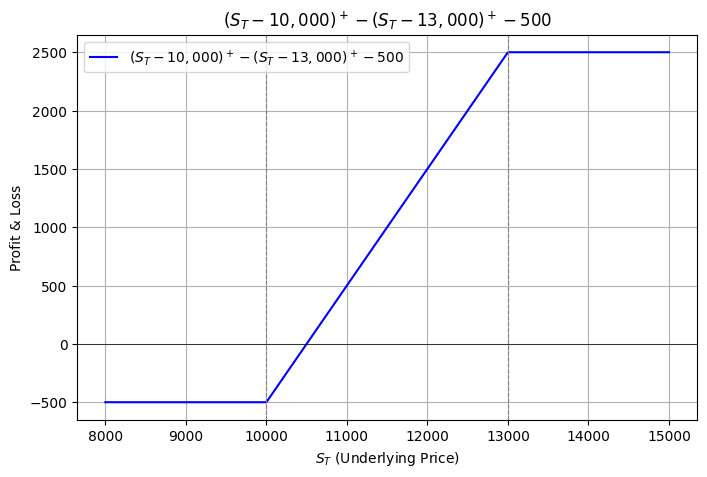

In [10]:
# (S_T - 10,000)^+ - (S_T - 13,000)^+ - 500（コールオプション）
plot_option_payoff(
    S_T_range=(8000, 15000, 500),
    option_terms=[(1, 10000, False), (-1, 13000, False)],
    fixed_cost=-500,
    title=r'$(S_T - 10,000)^+ - (S_T - 13,000)^+ - 500$'
)

### ベア戦略


以下同じ原資産（株式）に関する二つのオプションを売買する。
* (1)価格が1,000円。行使価格10,000円のプットオプションを1単位購入
* (2)価格が500円。行使価格7,000円のプットオプションを1単位売却

(1)の損益を$X$ 、(2)の損益を$Y$とすると

\begin{aligned}
X &= (10,000 - S_T)^+ - 1,000 \\
Y &= 500 - (7,000 - S_T)^+
\end{aligned}

総和を取ると

$$
X + Y = (10,000 - S_T)^+ - (7,000 - S_T)^+ - 500
$$

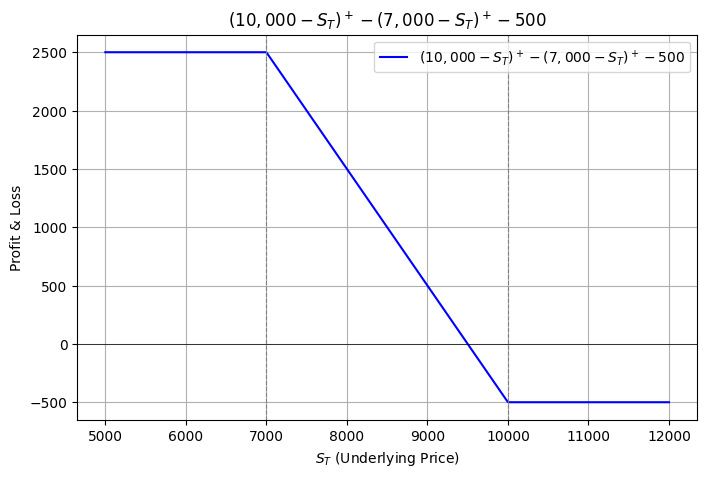

In [11]:
# (10,000 - S_T)^+ - (7,000 - S_T)^+ - 500（プットオプション）
plot_option_payoff(
    S_T_range=(5000, 12000, 500),
    option_terms=[(1, 10000, True), (-1, 7000, True)],
    fixed_cost=-500,
    title=r'$(10,000 - S_T)^+ - (7,000 - S_T)^+ - 500$'
)

### バタフライ戦略
以下同じ原資産（株式）に関する三つのオプションを売買する。
* (1)価格が1,600円。行使価格8,000円のコールオプションを1単位購入
* (2)価格が800円。行使価格10,000円のコールオプションを2単位売却
* (3)価格が400円。行使価格12,000円のコールオプションを1単位購入

(1)の損益を$X$ 、(2)の損益を$Y$、(3)の損益を$Z$とすると

\begin{aligned}
X &= (S_T - 8,000)^+ - 1,600 \\
Y &= 1,600 - 2(S_T - 10,000)^+\\
Z &= (S_T - 12,000)^+ - 400
\end{aligned}

総和を取ると

$$
X + Y + Z = (S_T - 8,000)^+ - 2(S_T - 10,000)^+ + (S_T - 12,000)^+ -400
$$

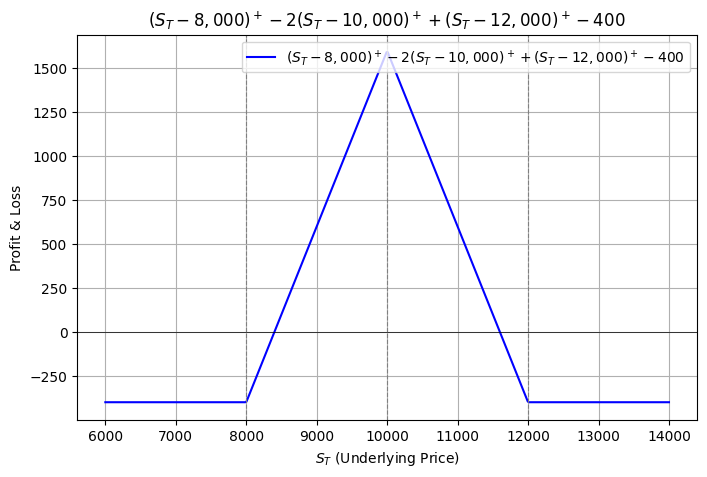

In [12]:
# (S_T - 8,000)^+ - 2(S_T - 10,000)^+ + (S_T - 12,000)^+ -400（コールオプション）
plot_option_payoff(
    S_T_range=(6000, 14000, 500),
    option_terms=[(1, 8000, False), (-2, 10000, False), (1, 12000, False)],
    fixed_cost=-400,
    title=r'$(S_T - 8,000)^+ - 2(S_T - 10,000)^+ + (S_T - 12,000)^+ -400$'
)

### （参考）ちょっとしたシミュレーション
実際に原資産が以下の確率微分方程式で動く株価を基に、バタフライ戦略でどのような損益がでるかシミュレーションしてみよう。
$$
dS_t = \mu S_t dt + \sigma S_t dW_t , S_0 = 10,000
$$

この式の時間に応じた期待値分散は
\begin{aligned}
E[S_t] &= S_0 e^{\mu t} \\
\text{Var}(S_t) &= S_0^2 e^{2\mu t} \left( e^{\sigma^2 t} - 1 \right)
\end{aligned}

In [45]:
# パラメータ設定
S_0 = 10000    # 初期株価
mu = 0.0       # ドリフト（株価成長率）
sigma = 0.05   # ボラティリティ（株価の変動幅）
T = 1          # 1年（期間）
N = 252        # 252営業日（1年）
dt = T / N     # 1ステップの時間

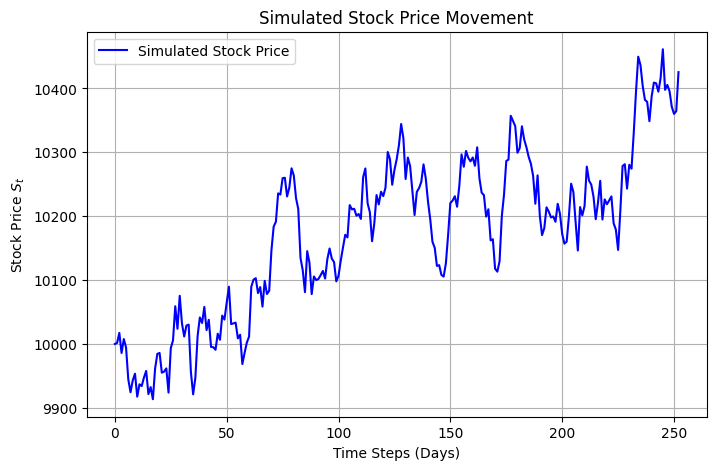

In [46]:
np.random.seed(4)  # 乱数固定（再現性確保）

# ---- 株価シミュレーション ----
S_t = np.zeros(N + 1)
S_t[0] = S_0  # 初期株価

# 時間経過に伴う株価の変化をシミュレーション
for t in range(1, N + 1):
    dW = np.random.randn() * np.sqrt(dt)  # 標準正規乱数
    S_t[t] = S_t[t - 1] + mu * S_t[t - 1] * dt + sigma * S_t[t - 1] * dW

# ---- グラフ描画 ----
plt.figure(figsize=(8, 5))
plt.plot(range(N + 1), S_t, label="Simulated Stock Price", color='b')
plt.xlabel("Time Steps (Days)")
plt.ylabel("Stock Price $S_t$")
plt.title("Simulated Stock Price Movement")
plt.legend()
plt.grid()
plt.show()

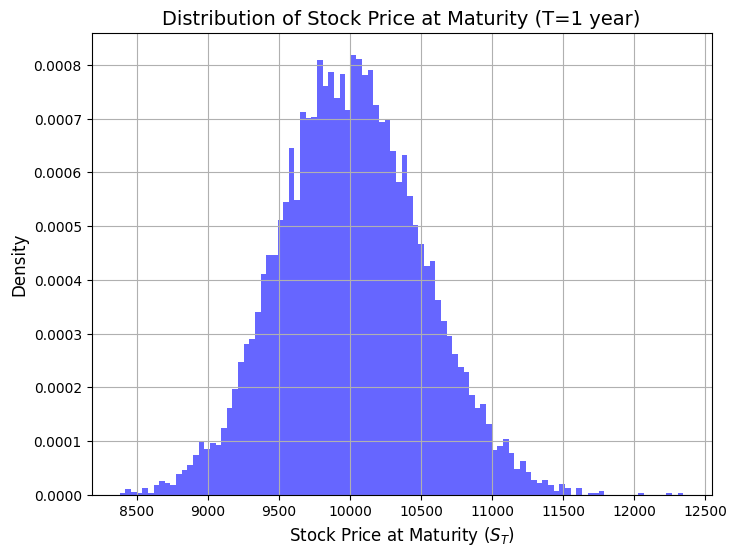

In [47]:
# ログ正規分布に従う株価S_Tのシミュレーション
n_simulations = 10000  # シミュレーションの回数
random_normals = np.random.normal(mu * T, sigma * np.sqrt(T), n_simulations)
S_T = S_0 * np.exp(random_normals)  # 幾何ブラウン運動の株価

# 分布のプロット
plt.figure(figsize=(8, 6))
plt.hist(S_T, bins=100, density=True, alpha=0.6, color='b')

# グラフ設定
plt.title(f'Distribution of Stock Price at Maturity (T={T} year)', fontsize=14)
plt.xlabel('Stock Price at Maturity ($S_T$)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()


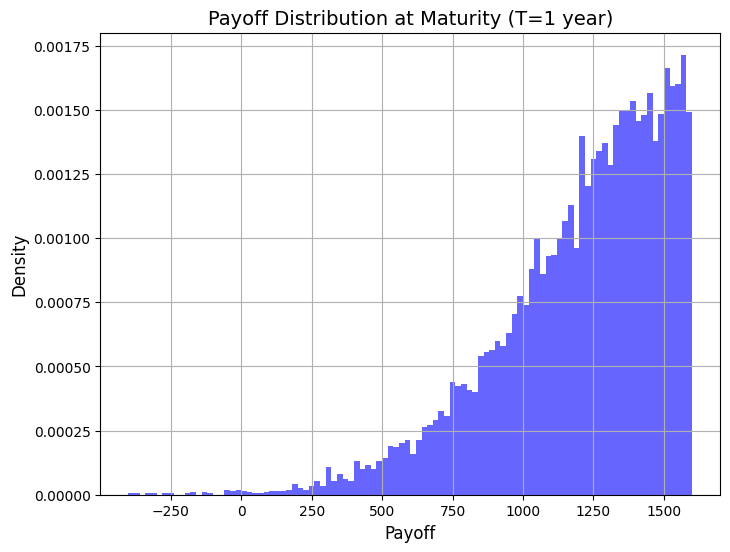

In [48]:
# ログ正規分布に従う株価S_Tのシミュレーション
n_simulations = 10000  # シミュレーションの回数
random_normals = np.random.normal(mu * T, sigma * np.sqrt(T), n_simulations)
S_T = S_0 * np.exp(random_normals)  # 幾何ブラウン運動の株価

# 戦略に基づく損益計算
payoff = np.maximum(S_T - 8000, 0) - 2 * np.maximum(S_T - 10000, 0) + np.maximum(S_T - 12000, 0) - 400

# 損益の分布のプロット
plt.figure(figsize=(8, 6))
plt.hist(payoff, bins=100, density=True, alpha=0.6, color='b')

# グラフ設定
plt.title(f'Payoff Distribution at Maturity (T={T} year)', fontsize=14)
plt.xlabel('Payoff', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

## プット・コールパリティ
### 一物一価の法則
ペイオフが全く同じ金融商品は現在価値も同じ。

### プット・コールパリティ
同じ権利行使価格（K）と満期（T）を持つコールオプションとプットオプションの価格関係を示す式
$$
C + \frac{K}{1 + R} = S + P
$$

ここで、$C,P$はそれぞれコールオプション、プットオプションの$t = 0$における価格、$S$は株の$t = 0$の価格、$K$は行使価格、$R$は安全資産の利率。

解釈として「コールとプットの価格の違いは、原資産価格と割引された権利行使価格の差で決まる」と理解できる
$$
C - P  = S - \frac{K}{1 + R}
$$

確認）以下二つのポートフォリオを考える

* (1)コールオプション + $\frac{K}{1 + R}$の安全資産
* (2)プットオプション + 原資産の現物

このとき、それぞれのポートフォリオの価値に関する推移は以下のようになる

|  | $t=0$      |   $t = T$      |
|------------|-------------------|---------|
| ポートフォリオ(1)| $C + \frac{K}{1 + R}$ | $(S_t - K)^+ + K$|
| ポートフォリオ(2)| $P + S$|$(K - S_t)^+ + S_t$ |

ここで$t=T$の価値を良く計算すると
ポートフォリオ(1) とポートフォリオ(2) の満期時点での価値が等しいことがわかる
$$
(S_T - K)^+ + K = (K - S_T)^+ + S_T
$$

####  $ S_T \geq K $

- $ (S_T - K)^+ = S_T - K $
- $ (K - S_T)^+ = 0 $

したがって

$$
(S_T - K) + K = S_T
$$

#### $ S_T < K $

- $ (S_T - K)^+ = 0 $
- $ (K - S_T)^+ = K - S_T $

したがって

$$
0 + K = (K - S_T) + S_T
$$



